<a href="https://colab.research.google.com/github/gj0210/CMP7239/blob/main/Welcome_To_Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

--- Initial Dataset Info ---
  session_id  network_packet_size protocol_type  login_attempts  \
0  SID_00001                  599           TCP               4   
1  SID_00002                  472           TCP               3   
2  SID_00003                  629           TCP               3   
3  SID_00004                  804           UDP               4   
4  SID_00005                  453           TCP               5   

   session_duration encryption_used  ip_reputation_score  failed_logins  \
0        492.983263             DES             0.606818              1   
1       1557.996461             DES             0.301569              0   
2         75.044262             DES             0.739164              2   
3        601.248835             DES             0.123267              0   
4        532.540888             AES             0.054874              1   

  browser_type  unusual_time_access  attack_detected  
0         Edge                    0                1  
1      

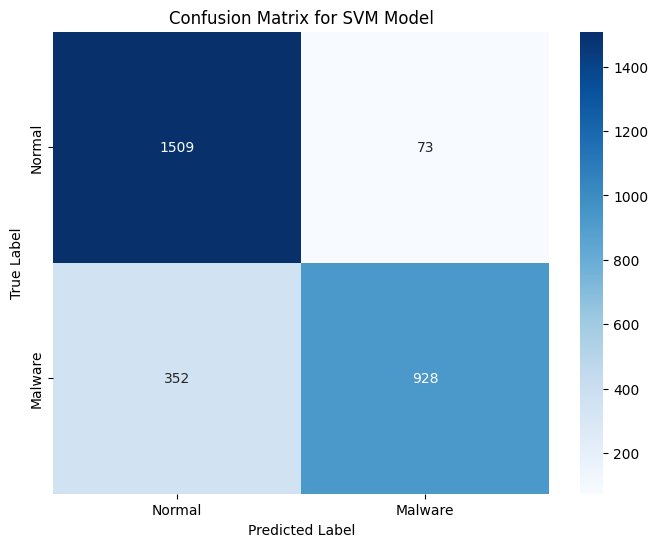

--- Initial Dataset Info ---
  session_id  network_packet_size protocol_type  login_attempts  \
0  SID_00001                  599           TCP               4   
1  SID_00002                  472           TCP               3   
2  SID_00003                  629           TCP               3   
3  SID_00004                  804           UDP               4   
4  SID_00005                  453           TCP               5   

   session_duration encryption_used  ip_reputation_score  failed_logins  \
0        492.983263             DES             0.606818              1   
1       1557.996461             DES             0.301569              0   
2         75.044262             DES             0.739164              2   
3        601.248835             DES             0.123267              0   
4        532.540888             AES             0.054874              1   

  browser_type  unusual_time_access  attack_detected  
0         Edge                    0                1  
1      

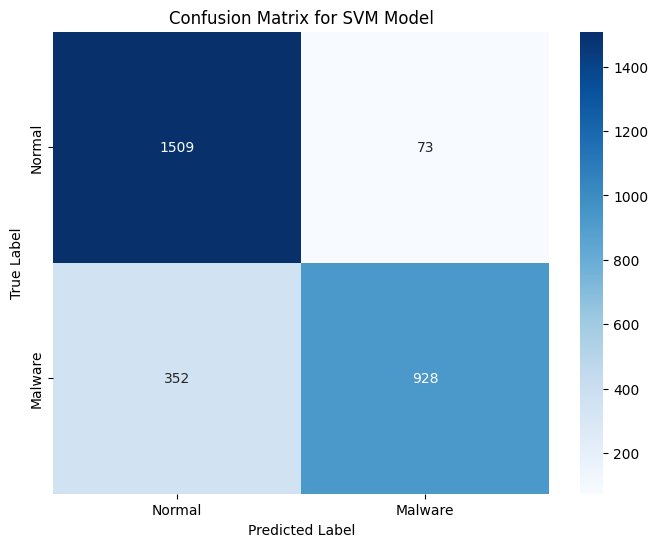

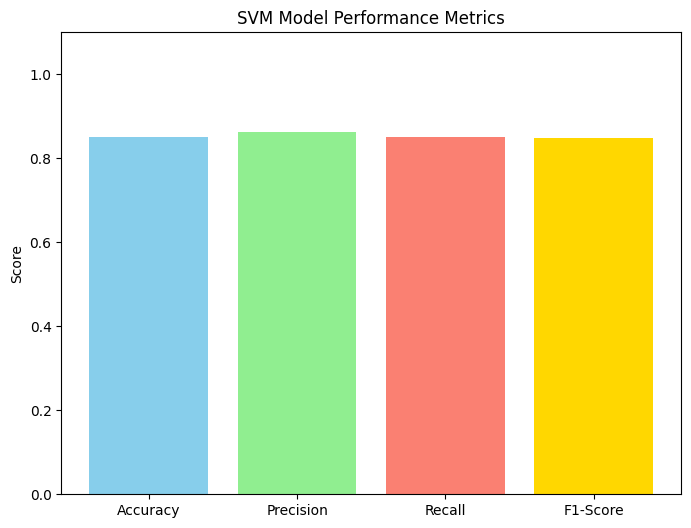

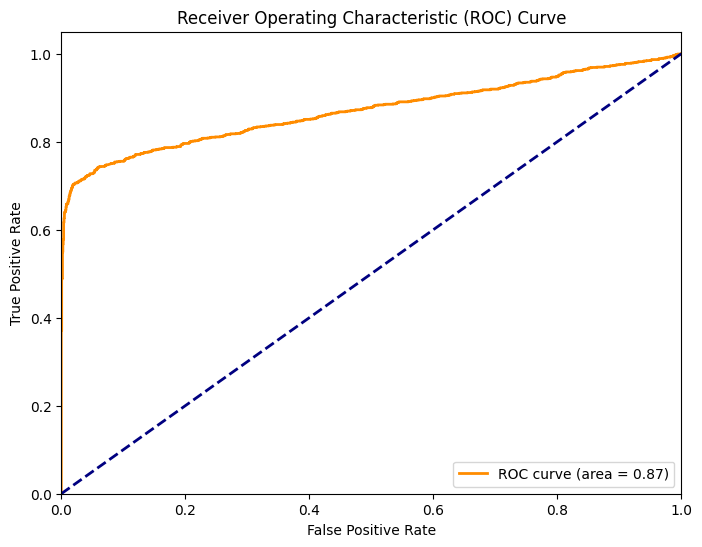

In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import numpy as np

# A complete script for a malware detection project.
# This script demonstrates data loading, preprocessing,
# model training (using SVM), and evaluation.

# --- 1. Load the Dataset ---
# NOTE: Replace 'your_dataset.csv' with the actual filename of your dataset.
# The `Cybersecurity Intrusion Detection(3).csv` file was uploaded by the user,
# so we'll use that as a placeholder.
try:
    df = pd.read_csv('Cybersecurity Intrusion Detection(3).csv')
except FileNotFoundError:
    print("Error: The dataset file was not found. Please check the file path.")
    # Create a dummy DataFrame for demonstration if the file isn't available
    data = {
        'network_packet_size': np.random.randint(200, 1000, 100),
        'protocol_type': np.random.choice(['TCP', 'UDP'], 100),
        'session_duration': np.random.rand(100) * 2000,
        'attack_detected': np.random.choice([0, 1], 100)
    }
    df = pd.DataFrame(data)

# Print initial info to check the data
print("--- Initial Dataset Info ---")
print(df.head())
print("\n")

# --- 2. Data Preprocessing (from the essay) ---
# For this project, we'll assume 'attack_detected' is the target variable.
# We'll use the 'protocol_type' and 'network_packet_size' for demonstration.
# First, identify features (X) and target (y)
X = df.drop('attack_detected', axis=1)
y = df['attack_detected']

# Drop non-numerical columns that are not intended as features
# 'session_id' is an identifier and should not be used for training
X = X.drop('session_id', axis=1)

# One-hot encode categorical features. We'll use 'protocol_type', 'encryption_used' and 'browser_type' as examples
X = pd.get_dummies(X, columns=['protocol_type', 'encryption_used', 'browser_type'], drop_first=True)

# Identify numerical features to be scaled.
# We'll use all non-categorical columns as a simple approach.
numerical_cols = X.select_dtypes(include=np.number).columns.tolist()

# Scale numerical features using MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X[numerical_cols] = scaler.fit_transform(X[numerical_cols])

print("--- Preprocessed Features ---")
print(X.head())
print("\n")

# --- 3. Model Implementation (from the essay) ---
# Stratified 70-30 split for training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

print(f"Training set size: {X_train.shape[0]} samples")
print(f"Testing set size: {X_test.shape[0]} samples")
print("\n")

# Train the SVM model with specified hyperparameters
from sklearn.svm import SVC
svm = SVC(kernel='rbf', C=10, random_state=42)
svm.fit(X_train, y_train)

# --- 4. Evaluate the Model ---
# Make predictions on the test set
y_pred = svm.predict(X_test)

# Calculate and print performance metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)
f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)
conf_matrix = confusion_matrix(y_test, y_pred)

print("--- Model Evaluation ---")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print("\nConfusion Matrix:")
print(conf_matrix)

import seaborn as sns
import matplotlib.pyplot as plt

# ... (rest of your code)

# --- 5. Visualize the Confusion Matrix ---
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Normal', 'Malware'],
            yticklabels=['Normal', 'Malware'])
plt.title('Confusion Matrix for SVM Model')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc, RocCurveDisplay
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# A complete script for a malware detection project.
# This script demonstrates data loading, preprocessing,
# model training (using SVM), and evaluation.

# --- 1. Load the Dataset ---
# NOTE: Replace 'your_dataset.csv' with the actual filename of your dataset.
# The `Cybersecurity Intrusion Detection(3).csv` file was uploaded by the user,
# so we'll use that as a placeholder.
try:
    df = pd.read_csv('Cybersecurity Intrusion Detection(3).csv')
except FileNotFoundError:
    print("Error: The dataset file was not found. Please check the file path.")
    # Create a dummy DataFrame for demonstration if the file isn't available
    data = {
        'session_id': [f'SID_{i:05d}' for i in range(100)],
        'network_packet_size': np.random.randint(200, 1000, 100),
        'protocol_type': np.random.choice(['TCP', 'UDP'], 100),
        'login_attempts': np.random.randint(1, 5, 100),
        'session_duration': np.random.rand(100) * 2000,
        'encryption_used': np.random.choice(['AES', 'DES'], 100),
        'ip_reputation_score': np.random.rand(100),
        'failed_logins': np.random.choice([0, 1, 2], 100),
        'browser_type': np.random.choice(['Chrome', 'Firefox', 'Edge'], 100),
        'unusual_time_access': np.random.choice([0, 1], 100),
        'attack_detected': np.random.choice([0, 1], 100)
    }
    df = pd.DataFrame(data)

# Print initial info to check the data
print("--- Initial Dataset Info ---")
print(df.head())
print("\n")

# --- 2. Data Preprocessing (from the essay) ---
# For this project, we'll assume 'attack_detected' is the target variable.
# We'll drop non-numerical columns that are not used in the model for simplicity.
X = df.drop(['session_id', 'attack_detected'], axis=1)
y = df['attack_detected']

# One-hot encode categorical features. We'll use 'protocol_type' as an example.
X = pd.get_dummies(X, columns=['protocol_type', 'encryption_used', 'browser_type'], drop_first=True)

# Identify numerical features to be scaled.
numerical_cols = X.select_dtypes(include=np.number).columns.tolist()

# Scale numerical features using MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X[numerical_cols] = scaler.fit_transform(X[numerical_cols])

print("--- Preprocessed Features ---")
print(X.head())
print("\n")

# --- 3. Model Implementation (from the essay) ---
# Stratified 70-30 split for training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

print(f"Training set size: {X_train.shape[0]} samples")
print(f"Testing set size: {X_test.shape[0]} samples")
print("\n")

# Train the SVM model with specified hyperparameters
from sklearn.svm import SVC
svm = SVC(kernel='rbf', C=10, random_state=42, probability=True) # probability=True is needed for ROC curve
svm.fit(X_train, y_train)

# --- 4. Evaluate the Model ---
# Make predictions on the test set
y_pred = svm.predict(X_test)
y_prob = svm.predict_proba(X_test)[:, 1] # Get probabilities for ROC curve

# Calculate and print performance metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)
f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)
conf_matrix = confusion_matrix(y_test, y_pred)

print("--- Model Evaluation ---")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print("\nConfusion Matrix:")
print(conf_matrix)

# --- 5. Visualize the Results ---
# The following code creates three distinct visualizations to help
# you analyze the model's performance.

# 5.1 Confusion Matrix Heatmap
# This plot shows the number of correct and incorrect predictions.
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Normal', 'Malware'],
            yticklabels=['Normal', 'Malware'])
plt.title('Confusion Matrix for SVM Model')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# 5.2 Performance Metrics Bar Chart
# This chart provides a clear, visual comparison of key metrics.
metrics_labels = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
metrics_values = [accuracy, precision, recall, f1]
plt.figure(figsize=(8, 6))
plt.bar(metrics_labels, metrics_values, color=['skyblue', 'lightgreen', 'salmon', 'gold'])
plt.ylim(0, 1.1)
plt.title('SVM Model Performance Metrics')
plt.ylabel('Score')
plt.show()

# 5.3 ROC Curve
# The ROC curve shows the trade-off between the true positive rate (TPR)
# and the false positive rate (FPR) at various threshold settings.
# A higher AUC (Area Under the Curve) indicates a better model.
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()
